In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()
input=list(uploaded.keys())
input=input[0]

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
types = dataset.dtypes
print(types)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
types = dataset.dtypes
print(types)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [8]:
class_counts = dataset.groupby('NumOfProducts').size()

print(class_counts)

NumOfProducts
1    5084
2    4590
3     266
4      60
dtype: int64


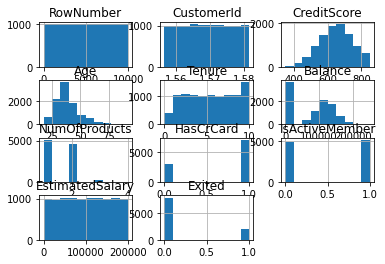

In [9]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

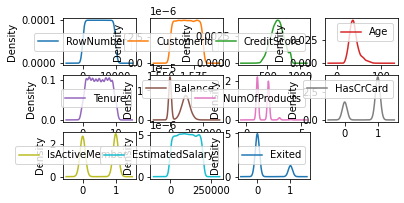

In [10]:

dataset.plot(kind='density' ,subplots=True, layout=(4,4), sharex=False)
pyplot.show()

In [11]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,3:13].values
# Extracting dependent variable:
y = dataset.iloc[:, 13].values


In [12]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [13]:
print(y)

[1 0 1 ... 1 1 0]


In [14]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

In [16]:
print(X)

[[619 0 'Female' ... 1 1 101348.88]
 [608 2 'Female' ... 0 1 112542.58]
 [502 0 'Female' ... 1 0 113931.57]
 ...
 [709 0 'Female' ... 0 1 42085.58]
 [772 1 'Male' ... 1 0 92888.52]
 [792 0 'Female' ... 1 0 38190.78]]


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [18]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [19]:
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.compose import ColumnTransformer

 columnTransformer = ColumnTransformer([('Dummy', OneHotEncoder(), [1])],remainder='passthrough')
 X=columnTransformer.fit_transform(X)


 

In [20]:
print(X)
X

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [21]:
 X = X[:, 1:]

In [22]:
print(X)
X

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]


array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
print(X_train)

[[0.0 0.0 686 ... 1 1 179093.26]
 [1.0 0.0 632 ... 1 1 195978.86]
 [0.0 1.0 559 ... 1 0 85891.02]
 ...
 [0.0 0.0 735 ... 0 0 92220.12]
 [0.0 0.0 667 ... 1 0 97508.04]
 [1.0 0.0 697 ... 1 1 53581.14]]


In [25]:
print(y_train)

[0 0 1 ... 1 1 0]


In [26]:
print(X_test)

[[1.0 0.0 596 ... 0 0 41788.37]
 [0.0 0.0 623 ... 1 1 146379.3]
 [0.0 1.0 601 ... 1 0 58561.31]
 ...
 [0.0 0.0 730 ... 1 0 33373.26]
 [0.0 0.0 692 ... 1 0 76755.99]
 [1.0 0.0 628 ... 1 1 107674.3]]


In [27]:
print(y_test)

[0 0 0 ... 1 1 1]


In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)

[[-0.57946723 -0.57638802  0.35649971 ...  0.64920267  0.97481699
   1.36766974]
 [ 1.72572313 -0.57638802 -0.20389777 ...  0.64920267  0.97481699
   1.6612541 ]
 [-0.57946723  1.73494238 -0.96147213 ...  0.64920267 -1.02583358
  -0.25280688]
 ...
 [-0.57946723 -0.57638802  0.86500853 ... -1.54035103 -1.02583358
  -0.1427649 ]
 [-0.57946723 -0.57638802  0.15932282 ...  0.64920267 -1.02583358
  -0.05082558]
 [ 1.72572313 -0.57638802  0.47065475 ...  0.64920267  0.97481699
  -0.81456811]]


In [29]:
print(X_test)

[[ 1.72572313 -0.57638802 -0.57749609 ... -1.54035103 -1.02583358
  -1.01960511]
 [-0.57946723 -0.57638802 -0.29729735 ...  0.64920267  0.97481699
   0.79888291]
 [-0.57946723  1.73494238 -0.52560743 ...  0.64920267 -1.02583358
  -0.72797953]
 ...
 [-0.57946723 -0.57638802  0.81311987 ...  0.64920267 -1.02583358
  -1.16591585]
 [-0.57946723 -0.57638802  0.41876609 ...  0.64920267 -1.02583358
  -0.41163463]
 [ 1.72572313 -0.57638802 -0.24540869 ...  0.64920267  0.97481699
   0.12593183]]


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.811

In [32]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.856

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.867

In [34]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    }
}

In [35]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.8517,{'n_estimators': 10}


In [36]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[1538   69]
 [ 208  185]]


In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 86.15


In [40]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 72.835


In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 47.074


In [42]:
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 57.187


In [43]:
CreditScore =  600#@param {type:"number"}
Geography =  0.0#@param {type:"number"}
Gender = 0 #@param {type:"number"}
Age =  40#@param {type:"number"}
Tenure =  3#@param {type:"number"}
Balance = 60000 #@param {type:"number"}
NumOfProducts = 2 #@param {type:"number"}
HasCrCard = 0 #@param {type:"number"}
IsActiveMember =  1#@param {type:"number"}
EstimatedSalary = 0 #@param {type:"number"}
Exited = 0 #@param {type:"number"}


In [45]:
y_pred=model.predict(sc_X.transform(np.array([[0.0,CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]])))
print(np.array([[0.0,CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]]))
print("Prediction is:", y_pred)
if y_pred==1:
  print("Custome will not exit")
else:
  print("Customer will exit")

[[0.e+00 6.e+02 0.e+00 0.e+00 4.e+01 3.e+00 6.e+04 2.e+00 0.e+00 1.e+00
  0.e+00]]
Prediction is: [1]
Custome will not exit


In [46]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import pickle
print("[INFO] Saving model...")
saved_model=pickle.dump(model,open('/content/drive/My Drive/celebal_model.pkl', 'wb'))

[INFO] Saving model...


In [48]:
model = pickle.load(open('/content/drive/My Drive/celebal_model.pkl','rb'))  
# Load the pickled model 
#Dec_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [49]:
import joblib
filename = '/content/drive/My Drive/celebal.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8615


In [50]:
!pip install flask-ngrok

In [51]:
%mkdir templates -p

In [52]:
%%writefile templates/index.html
<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
<title>Machine Learning GROUP PROJECT</title>
<meta charset="UTF-8">
<link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
 <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous"> 
<style><!DOCTYPE html>
label {
  display: inline-block;
  width: 140px;
  text-align: right;
}​
h1 {text-align: center;}
h2 {text-align: center;}
h3 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
</head>

<body>
      
<div class="" style="background-color:black;" >
<div class="clearfix">
           
<div class="col-md-12">
<center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
<center><p style="font-size:40px;color:white;margin-top:10px;">Celebal Project</p></center> 
<center><p style="font-size:40px;color:white;margin-top:10px;">Customer Churn Prediction</p></center> 
</div>
</div>
</div>

<div class="login">


<!-- Main Input For Receiving Query to our ML -->
<form action="{{ url_for('predict')}}"method="get">

 <div class="block">
    <div class="mb-3">
  <label for="exampleFormControlInput1" class="form-label">Credit Score(100-1000)</label>
      <input type="number" name="creditscore" id="crditscore" value="" min="100" max="1000" placeholder="" required="required">
      </div>
      </div>
      <div class="block">
      <div class="mb-3">
      <label for="cars">Choose Geograpphy</label>
  <select name="geo" id="geo">
    <option value="0">France:0</option>
    <option value="1">Germany:1</option>
    <option value="2">Spain:2</option>
     </select>
       </div>
       </div>
      <div class="block">
      <div class="mb-3">
  <label for="exampleFormControlInput1" class="form-label">Age(18+)</label>
      <input type="number"  name="age" id="age" value=""min="18" max="100" placeholder="1" required="required">
      </div>
      </div>
 <div class="mb-3">
  <label for="exampleFormControlInput1" class="form-label">Tenure$(1-10)</label>
      <input type="number" name="tenure" id="tenure" value="" min="0" max="10" placeholder="1" required="required">
      </div>
      <div class="mb-3">
  <label for="exampleFormControlInput1" class="form-label">Balance</label>
      <input type="number"  name="balance" id="balance" value=""min="0" max="10000000" placeholder="1" required="required">
      </div>
       <div class="mb-3">
      <label for="exampleFormControlInput1" class="form-label">Number of Products(1-4)</label>
      <input type="number" name="numofproducts" id="numofproducts" value="" min="1" max="4" placeholder="0" required="required">
      </div>
      <div class="mb-3">
   <label for="cars">Has Credit Cards</label>
   <select name="creditcards" id="creditcards">
    <option value="0">No</option>
    <option value="1">Yes</option>
       </select>
      </div>
      <div class="mb-3">
   <label for="cars">Is Active Member</label>
   <select name="activemember" id="activemember">
    <option value="0">No</option>
    <option value="1">Yes</option>
       </select>
      </div>
       <div class="mb-3"> 
  <label for="exampleFormControlInput1" class="form-label">Salary</label>
      <input type="number"  name="salary" id="salary" value=""min="10" max="100000000" placeholder="1" required="required">
      </div>
  <div class="col-auto">
 
    <button type="submit" class="btn btn-danger">Predict</button>
  </div>
</form>

<br>
<br>
<h2>{{ prediction_text }}</h2>

</div>

<div class="" style="background-color:green;" >
<div class="clearfix">
           
<div class="col-md-12">
  <center><p style="font-size:25px;color:white;margin-top:20px;">TEAM ML-8</p></center>
</div>
</div>
</div>
</body>
</html>

Writing templates/index.html


In [53]:
!pip install flask-ngrok
import numpy as np
import pandas as pd
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle
app = Flask(__name__)
import pickle
model = pickle.load(open('/content/drive/My Drive/celebal_model.pkl', 'rb'))
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,3:13].values
# Extracting dependent variable:
y = dataset.iloc[:, 13].values
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
#dummy encoding.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('New', OneHotEncoder(), [1])],remainder='passthrough')
X=columnTransformer.fit_transform(X)
#dummy encoding.

 # Dummy Variable trapping
X = X[:, 1:] 
# Splitting the Dataset into the Training set and Test set

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Feature Scaling
# Standard Scaling:  Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
run_with_ngrok(app)

@app.route('/')
def home():
  
    return render_template("index.html")
  
@app.route('/predict',methods=['GET'])
def predict():
  '''
  For rendering results on HTML GUI
  '''
  creditscore = int(request.args.get('creditscore'))
  geo = int(request.args.get('geo'))
  age = int(request.args.get('age'))
  tenure = int(request.args.get('tenure'))  
  balance = int(request.args.get('balance'))
  numofproducts = int(request.args.get('numofproducts')) 
  creditcards=int(request.args.get('creditcards'))
  activemember = int(request.args.get('activemember'))
  
  salary = int(request.args.get('salary')) 
  
  
  y_pred= model.predict(sc_X.transform(np.array([[0,1, creditscore,geo,age,tenure,balance,
                                                  numofproducts,creditcards,activemember,salary]])))
  
  if y_pred==1:
    result="Customer will not exit Bank"
  else:
    result="Customer will exit bank"
        
  return render_template('index.html', prediction_text='Model  has predicted  : {}'.format(result))


app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://14e36948df7c.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [17/Jul/2021 09:56:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2021 09:56:04] "GET /favicon.ico HTTP/1.1" 404 -
